([<matplotlib.patches.Wedge at 0x7f331adc6b50>,
 [Text(0.3010292715984893, 1.058008212463818, '1'),
  Text(-1.0878338525961517, 0.16314873320321657, '2'),
  Text(-0.8569885629806699, -0.6896162722270456, '3'),
  Text(-0.4546204336776164, -1.0016587549074667, '4'),
  Text(-0.392095146839394, -1.027745783657123, '5'),
  Text(-0.31187529348866116, -1.0548619821148935, '6'),
  Text(0.6852080257505176, -0.8605172638867149, '水电费')],
 [Text(0.16419778450826686, 0.5770953886166279, '41%'),
  Text(-0.5933639195979008, 0.08899021811084538, '13%'),
  Text(-0.4674483070803654, -0.3761543303056612, '13%'),
  Text(-0.24797478200597256, -0.546359320858618, '1%'),
  Text(-0.21387008009421488, -0.5605886092675216, '0%'),
  Text(-0.17011379644836064, -0.57537926297176, '2%'),
  Text(0.37374983222755503, -0.46937305302911714, '29%')])

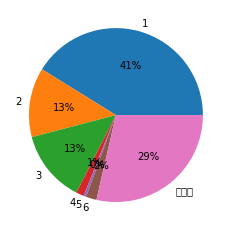

In [5]:
from matplotlib.font_manager import _rebuild
_rebuild() #reload一下
# 尝试花一个饼状图
import matplotlib.pyplot as plt
x = [ 252, 79, 82, 9, 3, 12, 175]
#labels = ["句内分析","指代分析","标签推导","标签错误","标签遗漏","标签重复","无法得出"]
labels = ["1","2","3","4","5","6","水电费"]

plt.pie(x,labels=labels,autopct='%.0f%%')

   句内分析  标签错误  指代分析  标签重复  标签推导  标签遗漏  无法得出
0   252     9    79    12    82     3   172
7


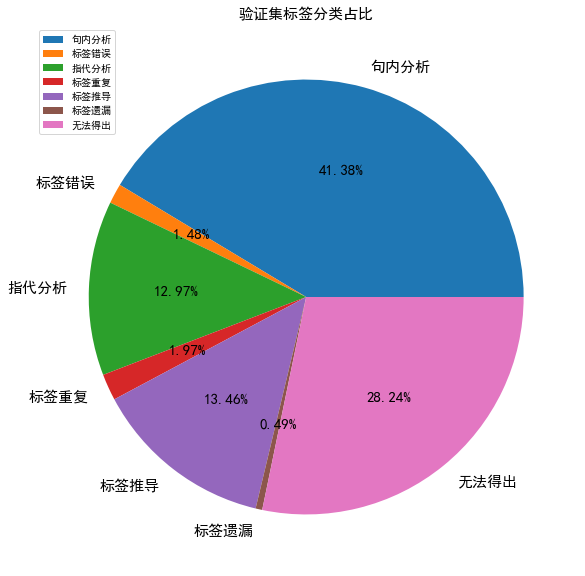

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import _rebuild

_rebuild() #reload一

labels = ["句内分析","标签错误","指代分析","标签重复","标签推导","标签遗漏","无法得出"]
data = {"句内分析": 252, "标签错误": 9,"指代分析": 79,"标签重复": 12, "标签推导": 82,  "标签遗漏": 3, "无法得出":172}
plt.figure(figsize = (10,10))
# 构造数据
data = pd.DataFrame([data])
print(data)
# 绘制圆环图，并返回饼块对象
# 有几个小块， wedges 的大小就是多少
wedges, texts,autotexts = plt.pie(data.iloc[0],
                        # wedgeprops={"width": 0.5},
                        labels=labels, # 传入什么标签
                        autopct='%.2f%%', # 是否输出比例值
                        textprops = {'fontsize':15, 'color':'k'}, # 控制pie中字体的格式
                        )
# 构造annotate函数的**kwargs参数，设置引导线线型
kw = dict(arrowprops=dict(arrowstyle="-"), zorder=0, va="center")
# 遍历饼块绘制注释标签和引导线
cnt = 0
for i, p in enumerate(wedges):
    # 根据matplotlib.patches.Wedge对象的theta1和theta2参数计算饼块均分点的角度
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
    # 根据角度的弧度计算 饼块均分点的坐标（引导线的起点）
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    # print(p.theta1, p.theta2, ang, np.deg2rad(ang), x, y)
    # 演示引导线起点位置
    # plt.plot(x, y, "or")
    # 根据x的值即角度所在象限确定引导线的对齐方式
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    # 设置引导线的连接方式
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    # 绘制注释标签和引导线
#     plt.annotate(
#         data.columns[i],
#         xy=(x, y),
#         xytext=(1.35 * np.sign(x), 1.4 * y),
#         horizontalalignment=horizontalalignment,        
#         **kw
#     )    
#     p.set_facecolor('red')
    cnt += 1
for i in texts:
    i.set_size=(10)

for i in autotexts:
    i.set_size=(100)

print(cnt)
plt.title("验证集标签分类占比",fontdict={"fontsize":15})
plt.legend()
plt.show()

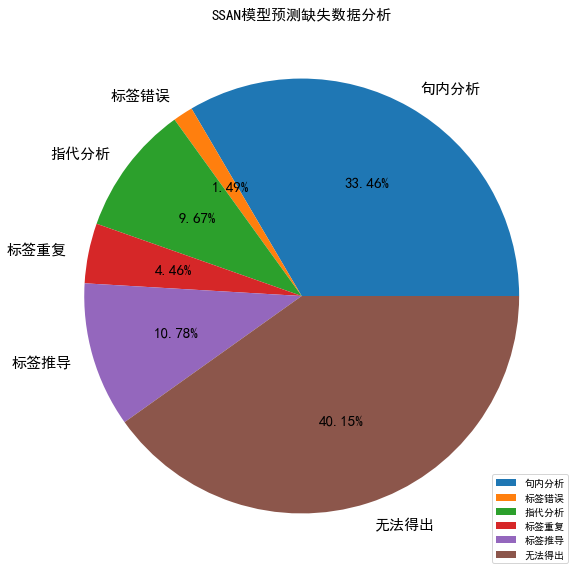

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

labels = ["句内分析","标签错误","指代分析","标签重复","标签推导","无法得出"]
data = {"句内分析": 90, "标签错误": 4,"指代分析": 26,"标签重复": 12, "标签推导": 29,  "无法得出":108}
plt.figure(figsize = (10,10))
# 构造数据
data = pd.DataFrame([data])
# print(data)
# 绘制圆环图，并返回饼块对象
# 有几个小块， wedges 的大小就是多少
wedges, texts,autotexts = plt.pie(data.iloc[0],
                        # wedgeprops={"width": 0.5},
                        labels=labels, # 传入什么标签
                        autopct='%.2f%%', # 是否输出比例值
                        textprops = {'fontsize':15, 'color':'k'}, # 控制pie中字体的格式
                        )
# 构造annotate函数的**kwargs参数，设置引导线线型
kw = dict(arrowprops=dict(arrowstyle="-"), zorder=0, va="center")
# 遍历饼块绘制注释标签和引导线

for i, p in enumerate(wedges):
    # 根据matplotlib.patches.Wedge对象的theta1和theta2参数计算饼块均分点的角度
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
    # 根据角度的弧度计算 饼块均分点的坐标（引导线的起点）
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    # print(p.theta1, p.theta2, ang, np.deg2rad(ang), x, y)
    # 演示引导线起点位置
    # plt.plot(x, y, "or")
    # 根据x的值即角度所在象限确定引导线的对齐方式
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    # 设置引导线的连接方式
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    # 绘制注释标签和引导线
#     plt.annotate(
#         data.columns[i],
#         xy=(x, y),
#         xytext=(1.35 * np.sign(x), 1.4 * y),
#         horizontalalignment=horizontalalignment,        
#         **kw
#     )    
for i in texts:
    i.set_size=(10)

for i in autotexts:
    i.set_size=(10)

plt.title("SSAN模型预测缺失数据分析",fontdict={"fontsize":15})
plt.legend(loc="lower right")
plt.show()
